<H1> <CENTER> FORTALEZA'S DEMOGRAPHIC DATA ANALYSIS  </CENTER> </H1>
<H3> <CENTER> UNTIL 2010  </CENTER> </H3>

<center>
**Keven Henrique Miranda Chaves**
<br>
Graduando em Engenharia de computação
<br>
Formação de data science
    
</center>

##### Importing necessaries libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.rc('figure', figsize=(15,8)) #def figsize fix
import seaborn as sns
import pandas as pd

##### Dataset = Fortaleza's demographic data
- Download in [https://dados.fortaleza.ce.gov.br/]

In [2]:
data = pd.read_excel('Fortaleza/Demographic data/dadosdemograficosdefortalezaate2010.xlsx', header=2)
data.head()

,REGIONAL,Bairros,População Total,Pop. Homens,Pop. Mulheres,Razão de Sexo,População (0-14 anos),População (15-64 anos),População (> 64 anos),% População (0-14 anos),% População (15-64 anos),% População (> 64 anos),Razão de Dependência,Média de moradores por domicílio
0,REGIONAL 6,Aerolândia,11360.0,5365.0,5995.0,89.49,2400.0,8118.0,842.0,21.13,71.46,7.41,39.94,3.45
1,REGIONAL 4,Aeroporto,8618.0,4160.0,4458.0,93.32,2389.0,5918.0,311.0,27.72,68.67,3.61,45.62,3.61
2,REGIONAL 2,Aldeota,42361.0,17980.0,24381.0,73.75,5600.0,31587.0,5174.0,13.22,74.57,12.21,34.11,3.08
3,REGIONAL 6,Alto da Balança,12814.0,5930.0,6884.0,86.14,2709.0,8941.0,1164.0,21.14,69.78,9.08,43.32,3.39
4,REGIONAL 1,Álvaro Weyne,23690.0,10834.0,12856.0,84.27,4959.0,16719.0,2012.0,20.93,70.57,8.49,41.70,3.52


## Data preprocessing
##### Checking the dataset:size, null data, basic informations and deleting null data.

In [3]:
data.shape #size of dataset (122 rows and 14 columns)

(122, 14)

In [4]:
data.info() #Information of dataset, knowing about the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REGIONAL                          122 non-null    object 
 1   Bairros                           120 non-null    object 
 2   População Total                   120 non-null    float64
 3   Pop. Homens                       120 non-null    float64
 4   Pop. Mulheres                     120 non-null    float64
 5   Razão de Sexo                     120 non-null    float64
 6   População (0-14 anos)             120 non-null    float64
 7   População (15-64 anos)            120 non-null    float64
 8   População (> 64 anos)             120 non-null    float64
 9   % População (0-14 anos)           120 non-null    float64
 10  % População (15-64 anos)          120 non-null    float64
 11  % População (> 64 anos)           120 non-null    float64
 12  Razão de

In [5]:
#Checking null data
data.isnull().sum()

REGIONAL                            0
Bairros                             2
População Total                     2
Pop. Homens                         2
Pop. Mulheres                       2
Razão de Sexo                       2
População (0-14 anos)               2
População (15-64 anos)              2
População (> 64 anos)               2
% População (0-14 anos)             2
% População (15-64 anos)            2
% População (> 64 anos)             2
Razão de Dependência                2
Média de moradores por domicílio    2
dtype: int64

In [6]:
#Searching null data, was found null data in all columns except in REGIONAL.
#After the checking the result was:

selecao = data['Bairros'].isnull()
data[selecao]

,REGIONAL,Bairros,População Total,Pop. Homens,Pop. Mulheres,Razão de Sexo,População (0-14 anos),População (15-64 anos),População (> 64 anos),% População (0-14 anos),% População (15-64 anos),% População (> 64 anos),Razão de Dependência,Média de moradores por domicílio
120,"Fonte: Censo 2010, IBGE.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,* Bairros novos (sem informação),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Deleting null data in all dataset
data.dropna(inplace=True)

In [8]:
#Checking again about null data = OK
data.isnull().sum()

REGIONAL                            0
Bairros                             0
População Total                     0
Pop. Homens                         0
Pop. Mulheres                       0
Razão de Sexo                       0
População (0-14 anos)               0
População (15-64 anos)              0
População (> 64 anos)               0
% População (0-14 anos)             0
% População (15-64 anos)            0
% População (> 64 anos)             0
Razão de Dependência                0
Média de moradores por domicílio    0
dtype: int64

#### Observations: A SMALL ANALYSIS BEFORE DATA ANALYSIS
1. The last column = 'Média de moradores por domicílio'. It has a interesting data, usully mean is size_of_thing by size_of_diferente_thing. In our case population size by houses size. 
2. However, we haven't size house, so, we have make a matemathics manipulation
3. So, we have: (População Total/Domicílio Total) = Média de moradores por domicílio
4. Soon we have: (População Total/Média de moradores por domicílio) = Domicílio Total

Let's 

In [9]:
#Creating new column
data['Domicílio Total'] = (data['População Total'] / data['Média de moradores por domicílio'])
data.head()

,REGIONAL,Bairros,População Total,Pop. Homens,Pop. Mulheres,Razão de Sexo,População (0-14 anos),População (15-64 anos),População (> 64 anos),% População (0-14 anos),% População (15-64 anos),% População (> 64 anos),Razão de Dependência,Média de moradores por domicílio,Domicílio Total
0,REGIONAL 6,Aerolândia,11360.0,5365.0,5995.0,89.49,2400.0,8118.0,842.0,21.13,71.46,7.41,39.94,3.45,3292.753623
1,REGIONAL 4,Aeroporto,8618.0,4160.0,4458.0,93.32,2389.0,5918.0,311.0,27.72,68.67,3.61,45.62,3.61,2387.257618
2,REGIONAL 2,Aldeota,42361.0,17980.0,24381.0,73.75,5600.0,31587.0,5174.0,13.22,74.57,12.21,34.11,3.08,13753.571429
3,REGIONAL 6,Alto da Balança,12814.0,5930.0,6884.0,86.14,2709.0,8941.0,1164.0,21.14,69.78,9.08,43.32,3.39,3779.941003
4,REGIONAL 1,Álvaro Weyne,23690.0,10834.0,12856.0,84.27,4959.0,16719.0,2012.0,20.93,70.57,8.49,41.70,3.52,6730.113636


##### The error below show us, that null values was created when new column was implemented

In [10]:
# Using apply() function with lambda for get integer values in column 'Domicílio total'
#data['Domicílio Total'].apply(lambda x: int(x))
#But a error below

In [11]:
#Checking again about null data
data.isnull().sum()

REGIONAL                            0
Bairros                             0
População Total                     0
Pop. Homens                         0
Pop. Mulheres                       0
Razão de Sexo                       0
População (0-14 anos)               0
População (15-64 anos)              0
População (> 64 anos)               0
% População (0-14 anos)             0
% População (15-64 anos)            0
% População (> 64 anos)             0
Razão de Dependência                0
Média de moradores por domicílio    0
Domicílio Total                     3
dtype: int64

##### Searching new null data

In [12]:
#Searching new null data
#Was possible to check 3 data from dataset that it is missing, even though let's delete this data
visualization_null_data = data['Domicílio Total'].isnull() == True
data[visualization_null_data]

,REGIONAL,Bairros,População Total,Pop. Homens,Pop. Mulheres,Razão de Sexo,População (0-14 anos),População (15-64 anos),População (> 64 anos),% População (0-14 anos),% População (15-64 anos),% População (> 64 anos),Razão de Dependência,Média de moradores por domicílio,Domicílio Total
77,REGIONAL 5,Novo Mondubim*,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
78,REGIONAL 3,Olavo Oliveira*,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
88,REGIONAL 6,Parque Santa Maria*,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


##### Deleting new null data

In [13]:
#DELETING ROWS THAT IS NULL
data.drop([77, 78, 88], axis=0, inplace=True)

In [14]:
# Desordering indexs
data.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            110, 111, 112, 113, 114, 115, 116, 117, 118, 119],
           dtype='int64', length=117)

In [15]:
# CHECKING AGAIN == OK
visualization_null_data = data['Domicílio Total'].isnull() == True
data[visualization_null_data]

,REGIONAL,Bairros,População Total,Pop. Homens,Pop. Mulheres,Razão de Sexo,População (0-14 anos),População (15-64 anos),População (> 64 anos),% População (0-14 anos),% População (15-64 anos),% População (> 64 anos),Razão de Dependência,Média de moradores por domicílio,Domicílio Total


In [16]:
# ordering the rows, after data deleted
data.index = range(data.shape[0])

In [17]:
# Verifying == OK
data.index

RangeIndex(start=0, stop=117, step=1)

In [18]:
# Using apply() function with lambda for get integer values in column 'Domicílio total'
data['Domicílio Total'] = data['Domicílio Total'].apply(lambda x: int(x))
data.head()

,REGIONAL,Bairros,População Total,Pop. Homens,Pop. Mulheres,Razão de Sexo,População (0-14 anos),População (15-64 anos),População (> 64 anos),% População (0-14 anos),% População (15-64 anos),% População (> 64 anos),Razão de Dependência,Média de moradores por domicílio,Domicílio Total
0,REGIONAL 6,Aerolândia,11360.0,5365.0,5995.0,89.49,2400.0,8118.0,842.0,21.13,71.46,7.41,39.94,3.45,3292
1,REGIONAL 4,Aeroporto,8618.0,4160.0,4458.0,93.32,2389.0,5918.0,311.0,27.72,68.67,3.61,45.62,3.61,2387
2,REGIONAL 2,Aldeota,42361.0,17980.0,24381.0,73.75,5600.0,31587.0,5174.0,13.22,74.57,12.21,34.11,3.08,13753
3,REGIONAL 6,Alto da Balança,12814.0,5930.0,6884.0,86.14,2709.0,8941.0,1164.0,21.14,69.78,9.08,43.32,3.39,3779
4,REGIONAL 1,Álvaro Weyne,23690.0,10834.0,12856.0,84.27,4959.0,16719.0,2012.0,20.93,70.57,8.49,41.70,3.52,6730


### EXPLORATORY DATA ANALYSIS

### ANALYSIS:
1. ANALYSIS AMOUNT OF HOUSES (%) BY DISTRICT
2. ANALYSIS AMOUNT OF POPULATION X REGIONAL
3. ANALYSIS AMOUNT OF POPULATION MAJOR 64 OLD YEAR X REGIONAL
3. ANALYSIS AMOUNT OF POPULATION MAJOR 64 OLD YEAR X DISTRICT
4. ANALYSIS DEPENDENCE REASON FOR MENS AND WOMANS
5. ANALYSES AMOUNT MENS AND WOMANS FOR DISTRICT AND REGIONAL

### 1 - Analysis amount of houses (%) by district

In [19]:
# create a new dataframe, that storage the larggest houses number with size = 10
data_nlargerst_by_domicilio = data.sort_values(by='Domicílio Total', ascending=False).head(10)
data_nlargerst_by_domicilio.head(3)

,REGIONAL,Bairros,População Total,Pop. Homens,Pop. Mulheres,Razão de Sexo,População (0-14 anos),População (15-64 anos),População (> 64 anos),% População (0-14 anos),% População (15-64 anos),% População (> 64 anos),Razão de Dependência,Média de moradores por domicílio,Domicílio Total
73,REGIONAL 5,Mondubim,76044.0,36555.0,39489.0,92.57,19726.0,53187.0,3131.0,25.94,69.94,4.12,42.97,3.44,22105
10,REGIONAL 1,Barra do Ceará,72423.0,34658.0,37765.0,91.77,18271.0,50651.0,3501.0,25.23,69.94,4.83,42.98,3.56,20343
115,REGIONAL 1,Vila Velha,61617.0,29108.0,32509.0,89.54,15394.0,42793.0,3430.0,24.98,69.45,5.57,43.99,3.55,17356


In [20]:
index = data_nlargerst_by_domicilio['Bairros']
values = data_nlargerst_by_domicilio['Domicílio Total']

#### Creating graphic area using subplots with matplotlib.pyplot

In [21]:
# Create graphic area for our visualization
area_1 = plt.figure()

<Figure size 1080x576 with 0 Axes>

In [22]:
gpc1 = area_1.add_subplot(1,2,1)
gpc2 = area_1.add_subplot(1,2,2)

C:\Users\engke\AppData\Local\Temp/ipykernel_14216/2274123416.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  gpc2.set_xticklabels(index, rotation=45)


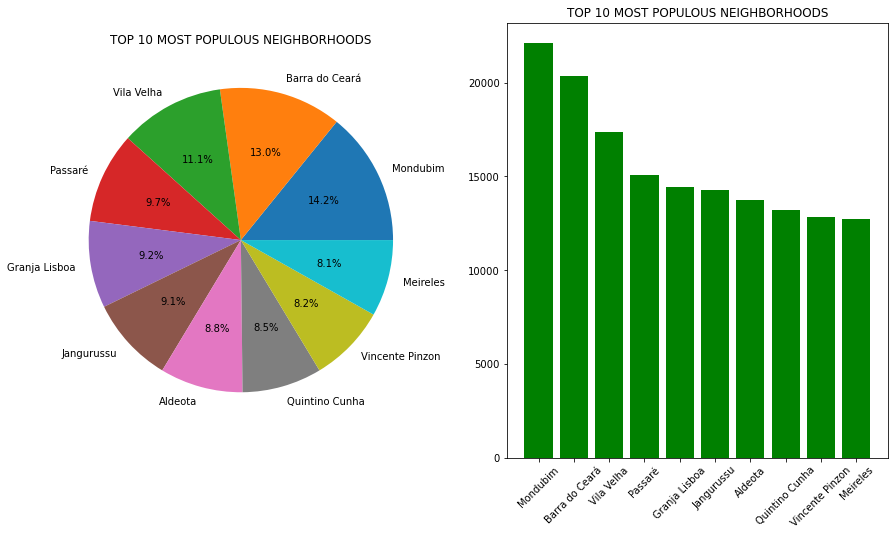

In [23]:
gpc1.pie(values, labels=index, autopct='%1.1f%%')
gpc1.set_title('TOP 10 MOST POPULOUS NEIGHBORHOODS')

gpc2.bar(index, values, width=0.8, color='Green')
gpc2.set_xticklabels(index, rotation=45)
gpc2.set_title('TOP 10 MOST POPULOUS NEIGHBORHOODS')

area_1

### 2. ANALYSIS AMOUNT OF POPULATION X REGIONAL

In [24]:
# Making tests for to find amount of population by regional
data.query("REGIONAL == 'REGIONAL 1'")['População Total'].sum()

363912.0

In [25]:
# I Remember that groupby make this. rsrs
popxreg = data.groupby('REGIONAL').sum()['População Total']
popxreg = popxreg.sort_values(ascending=False)
popxreg = popxreg.to_frame().reset_index()
popxreg

,REGIONAL,População Total
0,REGIONAL 5,541511.0
1,REGIONAL 6,541160.0
2,REGIONAL 1,363912.0
3,REGIONAL 2,363406.0
4,REGIONAL 3,360551.0
5,REGIONAL 4,281645.0


##### The graphic below, show us that the most population in regions

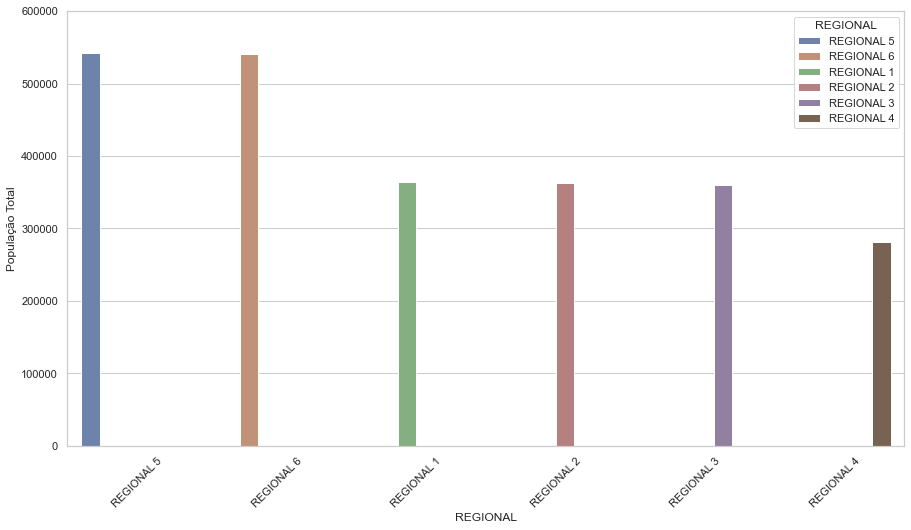

In [72]:
# Graaphic for represent the most part of city == regional 5
sns.barplot(data=popxreg, x='REGIONAL', y='População Total', hue=popxreg.REGIONAL, saturation=0.45)
plt.ylim(0,600000)
plt.xticks(rotation=45)
plt.show()

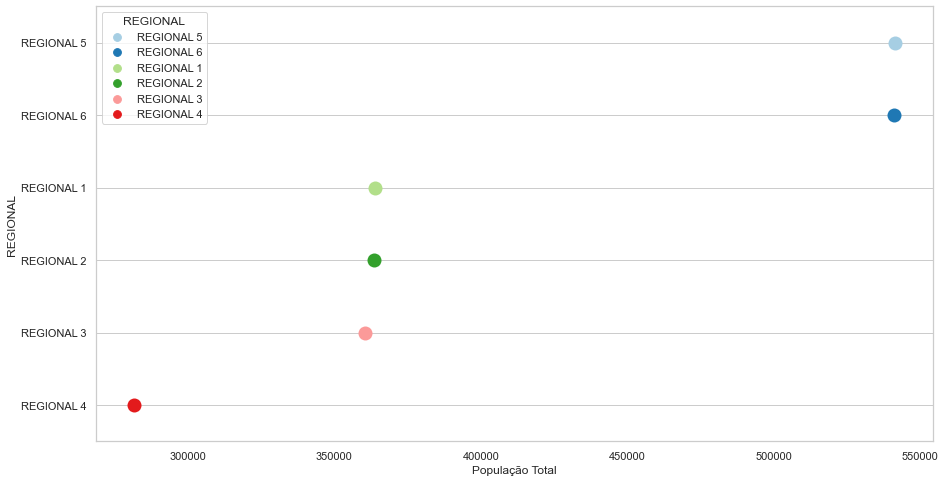

In [70]:
#ANOTHER DIFFERENT VISUALIZATION 
sns.swarmplot(data=popxreg, x="População Total", y='REGIONAL', hue='REGIONAL', palette='Paired', size=14)
plt.grid()

### according to these charts the biggest region is REGIONAL 5, so, we have...

In [61]:
# exploring the most region that is regional 5
#using groupby for new analysis
regional_5 = data.query("REGIONAL == 'REGIONAL 5'") #searching inside dataset
# ordering by Bairros, total sum, only colunm 'População Total'
group_regional5_x_popTotal = regional_5.groupby('Bairros').sum()['População Total'] 
group_regional5_x_popTotal = group_regional5_x_popTotal.sort_values(ascending=False)

#### Ploting another graphic, the biggest region (regional 5) and districts inside it.

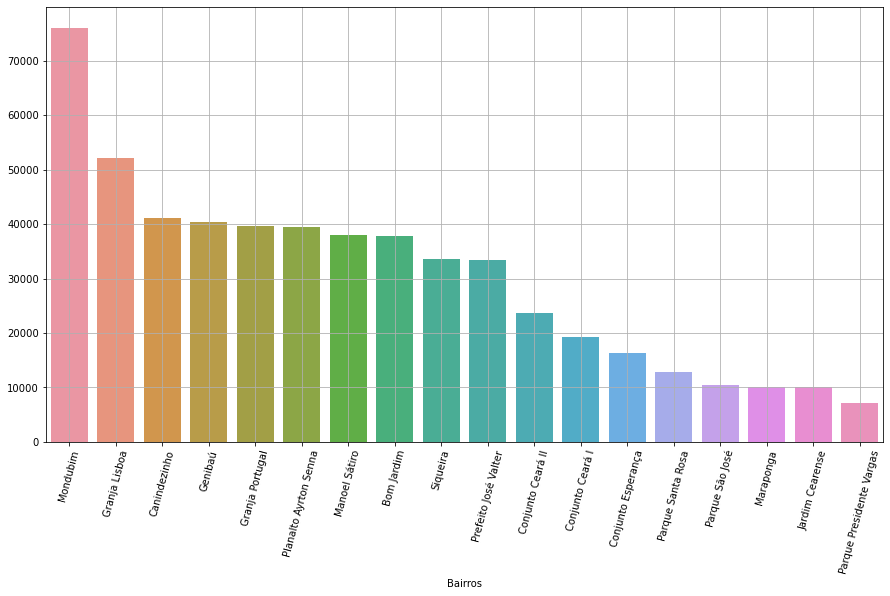

In [32]:
sns.barplot(x=group_regional5_x_popTotal.index, y=group_regional5_x_popTotal.values, data=regional_5)
plt.xticks(rotation=75)
plt.grid()
plt.show()

# The districts inside region 6, show us that part of population of city, lives in this region

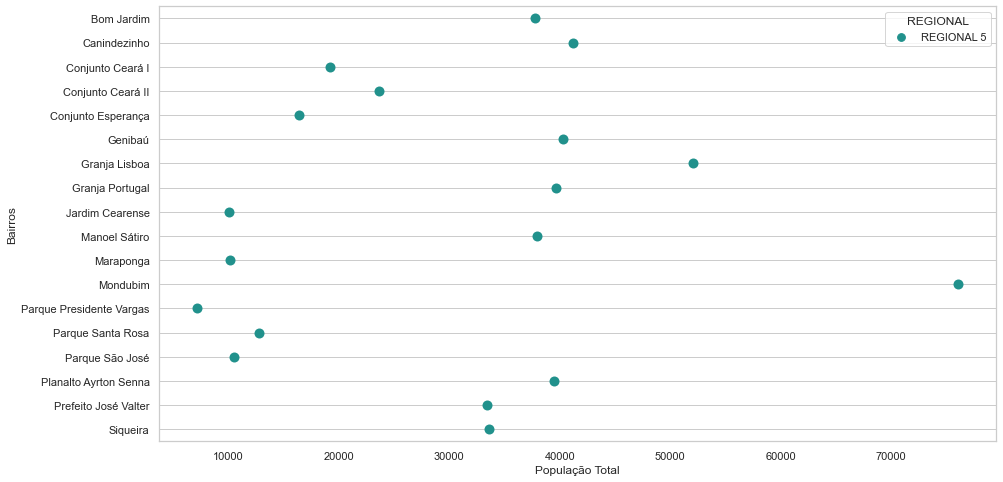

In [67]:
#ANOTHER DIFFERENT VISUALIZATION 
sns.swarmplot(data=regional_5, x="População Total", y="Bairros", hue='REGIONAL', palette='viridis', size=10)
plt.grid()